# Visualizing Crime and Incarceration in the United States

## Prison Dataframe Preparation

### Load Data and Packages

In [65]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from ipywidgets import interact, fixed

import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [145]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (10, 10)

In [67]:
prison = pd.read_csv("crime_and_incarceration_by_state.csv")
prison.head(3)

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0


### Dataframes 
The dataset comes from : https://www.kaggle.com/christophercorrea/prisoners-and-crime-in-united-states/downloads/prisoners-and-crime-in-united-states.zip/9 

The dataframe prison contains information such as the prisoner count, estimated crimes, count of various crimes (murder, rape, violent crime, ect.) for each state. Each row is for a state for a given year (2001-2017). 


### Sources Used
- Time Series Graphs
- https://matplotlib/time-series/

- "#242 Area chart and faceting" by The Python Graph Gallery
- https://python-graph-gallery.com/242-area-chart-and-faceting/

- "#82 Marginal plot with Seaborn" by The Python Graph Gallery
- https://python-graph-gallery.com/82-marginal-plot-with-seaborn/

- "Normalized Stacked Bar Chart" by Altair 
- https://altair-viz.github.io/gallery/normalized_stacked_bar_chart.html

- "#272 Map a color to bubble plot" by The Python Graph Gallery
- https://python-graph-gallery.com/272-map-a-color-to-bubble-plot/


### Data Dictionary 
In original dataframe
- jurisdiction - Denotes the jurisdiction (either a state or federal). 
- includes_jails - Denotes whethor or not jails (which are similar to a prison but often contains inmate of lesser crimes) are included for prisoner count. 
- year - The year of the observation. 
- prisoner_count- The year end count (Dec 31st) of prisoners in the jurisdiction
- crime_reporting_change - Denotes if there has been a change in the reporting system, can affect change in previous years. 
- crimes_estimated - Yes/No if the crimes have been estimated for a given state and year
- state_population - The state population
- violent_crime_total - Total of violent crimes
- murder_manslaughter - Total number of murder/manslaugher crimes
- rape_legacy - Total number of rapes reported under older defintions 
- rape_revised  - Total number of rapes reported under revised defintions
- robbery- Total number of robberies 
- agg_assault - Total number of aggravated assult crimes
- property_crime_total - Total number of property crimes
- burglary - Total number of burglaries 
- larceny - Total number of larcenies 
- vehicle_theft - Total number of vehicle thefts 

Added to dataframe (below)
- population_type - From very small to very big, a variable that groups the state_population size into types 
- prisoner_count_type - From very small to very big, a variable that groups the prisoner_count size into types
- pris_per_pop - A fraction of prisoner_count divided by state_population, designed to show how large the prison population for a state is compared to the total state population. 

## Quality Assurance and Modifying the Dataframe

In [68]:
prison.shape

(816, 17)

In [69]:
# Check for duplicates - None found
prison[prison.duplicated()].shape

(0, 17)

### Missing Values 

In [70]:
n_records = len(prison)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(prison)

jurisdiction | 0.0 | object
includes_jails | 0.0 | bool
year | 0.0 | int64
prisoner_count | 0.0 | int64
crime_reporting_change | 0.020833333333333332 | object
crimes_estimated | 0.020833333333333332 | object
state_population | 0.020833333333333332 | float64
violent_crime_total | 0.020833333333333332 | float64
murder_manslaughter | 0.020833333333333332 | float64
rape_legacy | 0.0821078431372549 | float64
rape_revised | 0.7561274509803921 | float64
robbery | 0.020833333333333332 | float64
agg_assault | 0.020833333333333332 | float64
property_crime_total | 0.020833333333333332 | float64
burglary | 0.020833333333333332 | float64
larceny | 0.020833333333333332 | float64
vehicle_theft | 0.020833333333333332 | float64


Most variables have very few missing values (less than 2.5%) except for rape_revised, which could be due to the fact that many states would not have implemented changes to the law until more recent years or not at all. 

### Extreme Values

In [71]:
def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(prison)

includes_jails | 0 | bool
year | 0 | int64
prisoner_count | 43 | int64
state_population | 0 | float64
violent_crime_total | 0 | float64
murder_manslaughter | 0 | float64
rape_legacy | 0 | float64
rape_revised | 0 | float64
robbery | 0 | float64
agg_assault | 0 | float64
property_crime_total | 0 | float64
burglary | 0 | float64
larceny | 0 | float64
vehicle_theft | 0 | float64


/home/csimmons1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [72]:
column = "prisoner_count"
print(f"the average for column {column} is {prison[column].mean()}")
#we consider outliers those observations with a z score (absolute) greater than 3
prison[(np.abs(stats.zscore(prison[column])) > 3)].head(10)

the average for column prisoner_count is 28606.033088235294


,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CALIFORNIA,False,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.0,NaN,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0
43,TEXAS,False,2001,148480,False,False,21370983.0,122155.0,1332.0,8169.0,NaN,35348.0,77306.0,976654.0,204362.0,669625.0,102667.0
51,FEDERAL,False,2002,158216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,CALIFORNIA,False,2002,159695,False,False,35001986.0,208388.0,2395.0,10198.0,NaN,64968.0,130827.0,1176484.0,238428.0,715692.0,222364.0
94,TEXAS,False,2002,152446,False,False,21736925.0,126018.0,1302.0,8508.0,NaN,37580.0,78628.0,1004274.0,212602.0,688992.0,102680.0
102,FEDERAL,False,2003,168144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,CALIFORNIA,False,2003,161785,False,False,35462712.0,205551.0,2407.0,9994.0,NaN,63770.0,129380.0,1215086.0,242274.0,731486.0,241326.0
145,TEXAS,False,2003,153056,False,False,22103374.0,122246.0,1422.0,8025.0,NaN,37017.0,75782.0,1016735.0,219877.0,698644.0,98214.0
153,FEDERAL,False,2004,177600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The federal prisons, as well as California and Texas have outliers for prisoner count. This is mostly because of the fact that the population is so large for both of these states. 

Taking a look at all of the states you can see the upper outliers:

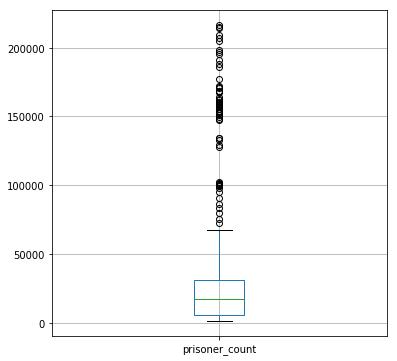

In [73]:
prison.boxplot(column='prisoner_count');

### New Columuns 

In [74]:
# Assigning Types to Variables
# population_type 
population_type = ['very small',"small",  "medium", "big", "very big"]

prison['population_type'] = pd.qcut(prison['state_population'],
                                  5, population_type)

#prisoner_count_type
prisoner_count_type = ['very small',"small",  "medium", "big", "very big"]

prison['prisoner_count_type'] = pd.qcut(prison['prisoner_count'],
                                  5, prisoner_count_type)
#violent_crime_type
violent_crime_type = ['very small',"small",  "medium", "big", "very big"]

prison['violent_crime_type'] = pd.qcut(prison['violent_crime_total'],
                                  5, violent_crime_type)

In [75]:
#Ratio of Prisoner Count to State Population - Used to compare the number of prisoners relative to the size of any given jurisdiction 
#pris_per_pop
prison["pris_per_pop"] = prison.prisoner_count/prison.state_population

### Subset df by Year/State

Subsets the dataframe for only the year 2001 and 2016

In [76]:
prison_2001 = prison[prison.year == 2001]
prison_2001.shape

(51, 21)

In [77]:
prison_2016 = prison[prison.year == 2016]
prison_2016.shape

(51, 21)

Subsets the dataframes for only virginia, california, federal, illinois, deleware, and 

In [78]:
prison_va = prison[prison.jurisdiction == "VIRGINIA"]
prison_va.shape

(16, 21)

In [79]:
prison_ca = prison[prison.jurisdiction == "CALIFORNIA"]
prison_ca.shape

(16, 21)

In [80]:
prison_fed = prison[prison.jurisdiction == "FEDERAL"]
prison_fed.shape

(16, 21)

In [81]:
prison_il = prison[prison.jurisdiction == "ILLINOIS"]
prison_il.shape

(16, 21)

In [82]:
prison_de = prison[prison.jurisdiction == "DELAWARE"]
prison_de.shape

(16, 21)

# Visualizations

## Exploratory Visualizations

This graph shows the trend of pris_per_pop (the ratio of prisoner count to state population) over all 50 states from 2001 to 2016. Some noteable observations are that:
- Deleware and Alaska both had high ratios of prisoner count to state population, and both have had that ratio decline, the latter more steeply than the former. 
- Oklahoma and Texas also have high ratios but less so than DE and AL with a very small decline in Texas. 
- There are many states with a very low ratio, including but not limited to Maine, Utah, and North Dakota. 

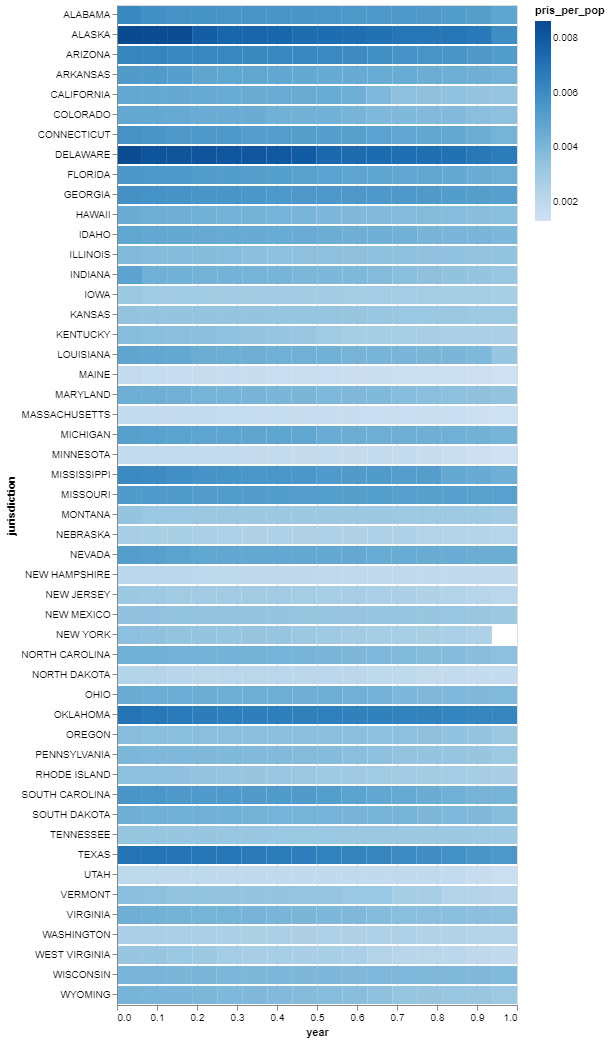

In [152]:
alt.Chart(prison).mark_bar().encode(
    x=alt.X('year', stack="normalize"),
    y='jurisdiction',
    color='pris_per_pop'
)

This graph shows the prisoner_count (the year end count of prisoners for a given state) over all 50 states (plus federal) from 2001 to 2016. Some noteable observations are that:
- The states of California and Texas both have high prisoner counts, as well as Federal. 
- Florida, Georgia, Illinois, and Pennsylvania are close behind. 

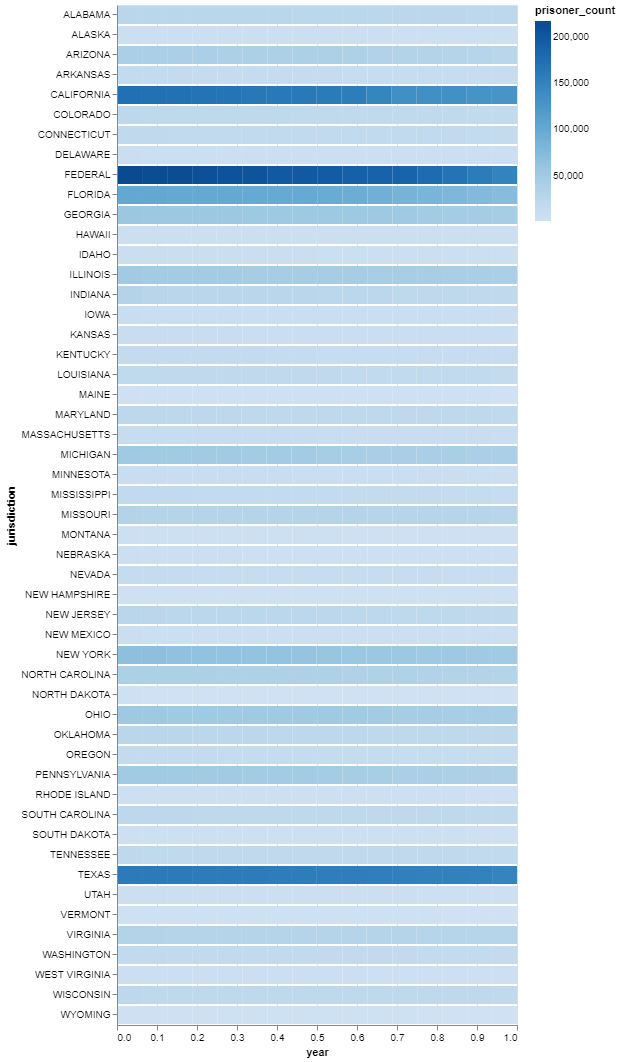

In [153]:
alt.Chart(prison).mark_bar().encode(
    x=alt.X('year', stack="normalize"),
    y='jurisdiction',
    color='prisoner_count'
)

This graph shows the trend of prisoner_count_type (the grouping from big to very small of prisoner_type) over all 50 states from 2001 to 2016. Some noteable observations are that:
- Most states stay within their population_type groups, but some states (15) increase or decrease their population and end up moving up or down in type.
- Alaska, West Virginia, Utah, and Hawaii moved up from very small to small. 
- Arizona and Pennsylvania moved down from very big to big. 

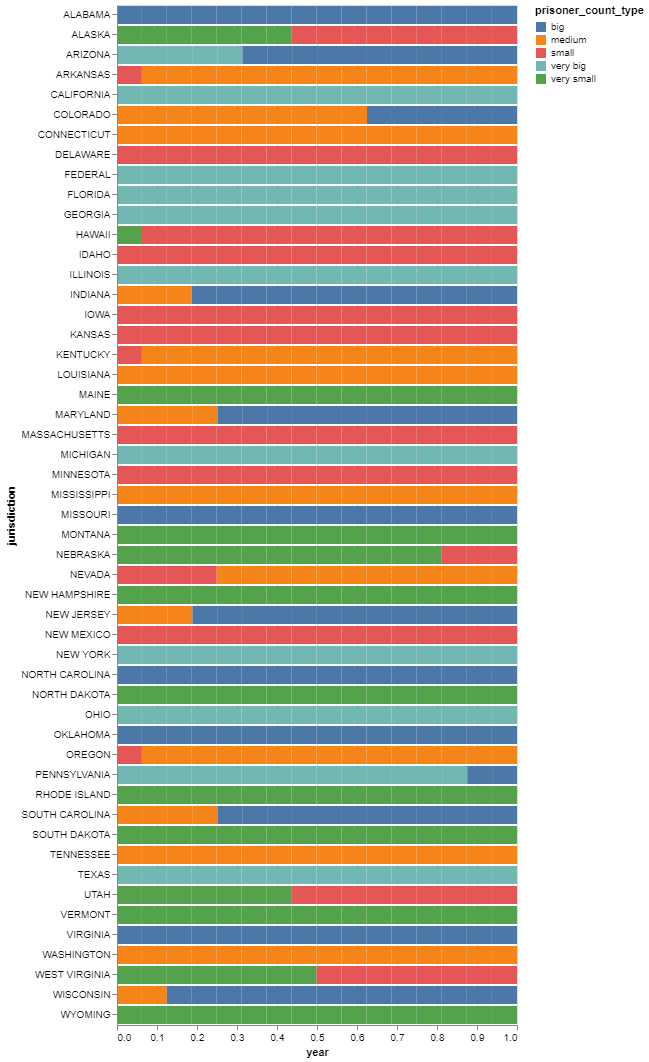

In [155]:
alt.Chart(prison).mark_bar().encode(
    x=alt.X('year', stack="normalize"),
    y='jurisdiction',
    color='prisoner_count_type'
)

This graph shows the trend of state_population over all 50 states from 2001 to 2016. Some noteable observations are that:
- Most states remain the same 
- New York is missing data from 2016

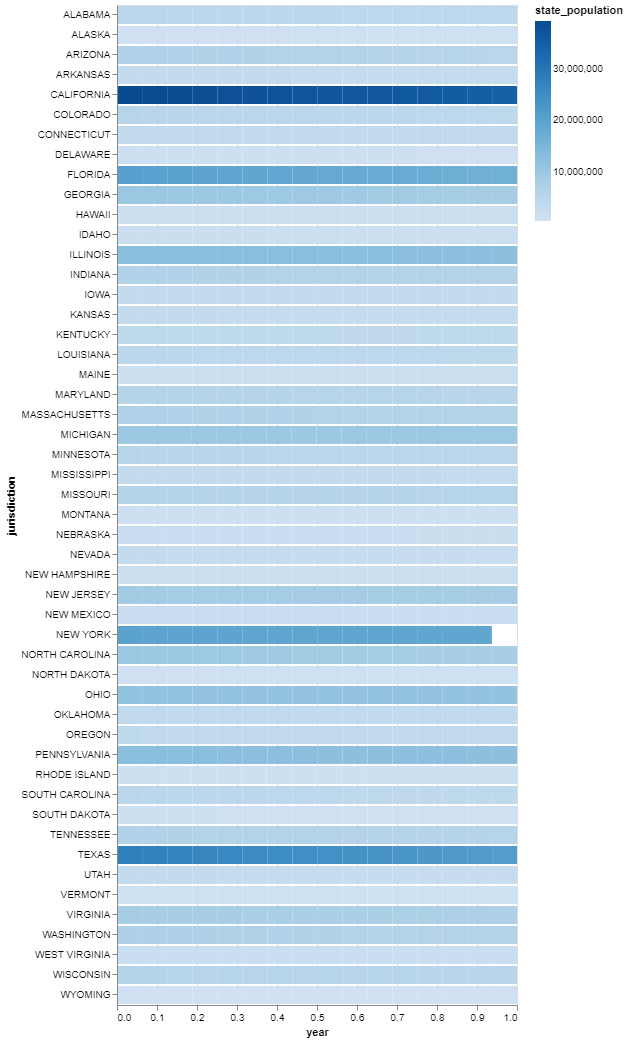

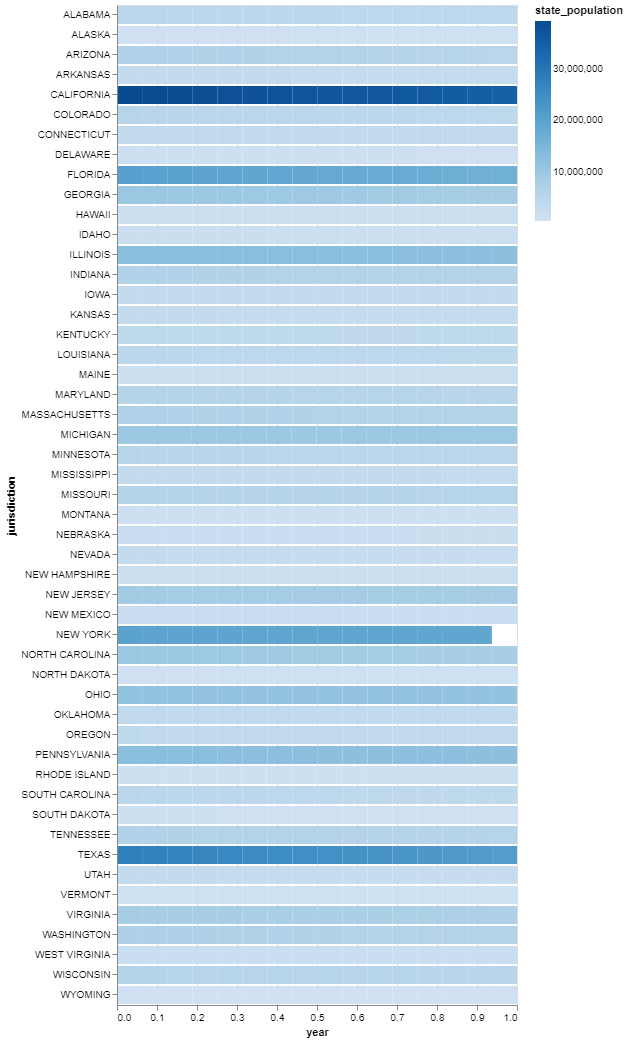

In [63]:
alt.Chart(prison).mark_bar().encode(
    x=alt.X('year', stack="normalize"),
    y='jurisdiction',
    color='state_population'
)

This graph shows the trend of violent_crime_total over all 50 states from 2001 to 2016. Some noteable observations are that:
- California has the highest violent crime, but overall declines in total violent crime 
- Other high states are Texas, New York, and Illinois. 

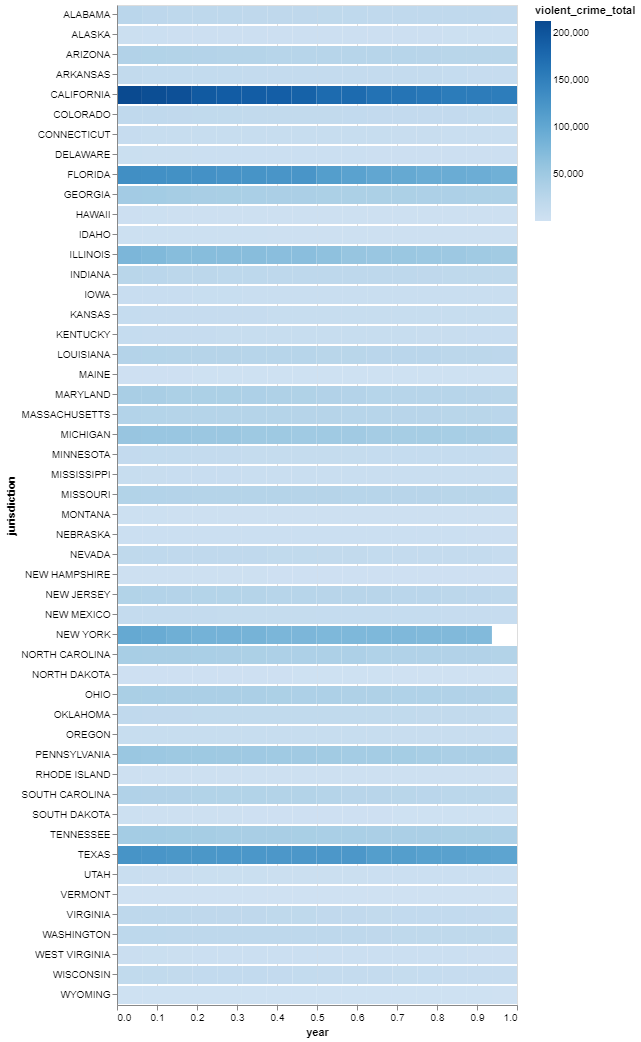

In [156]:
alt.Chart(prison).mark_bar().encode(
    x=alt.X('year', stack="normalize"),
    y='jurisdiction',
    color='violent_crime_total'
)

### Heatmaps

In [157]:
#Function that makes a pivot table 
def pivot_count(df, rows, columns):
    df_pivot = df.pivot_table(values="year",  
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [158]:
#Function that makes a heatmap from the pivot table 
def heatmap_count_types(df, col1, col2):
    pivot_table = pivot_count(df,col1, col2)
    sns.heatmap(pivot_table, annot=True, fmt='g')
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

In [159]:
# Here is an interactive widget to play around with heatmaps for several variables. 
# NOTE: must be set on two different variables to work. 
interact(heatmap_count_types, col1=prison.columns.drop(["year"]),
                                 col2=prison.columns.drop(["year"]),
                                 df=fixed(prison));

interactive(children=(Dropdown(description='col1', options=('jurisdiction', 'includes_jails', 'prisoner_count'…

Using the heat map above, this heat map shows how population type and prisoner count type interact. Generally the trend is that a large population type leads to a large prisoner count which makes sense. 

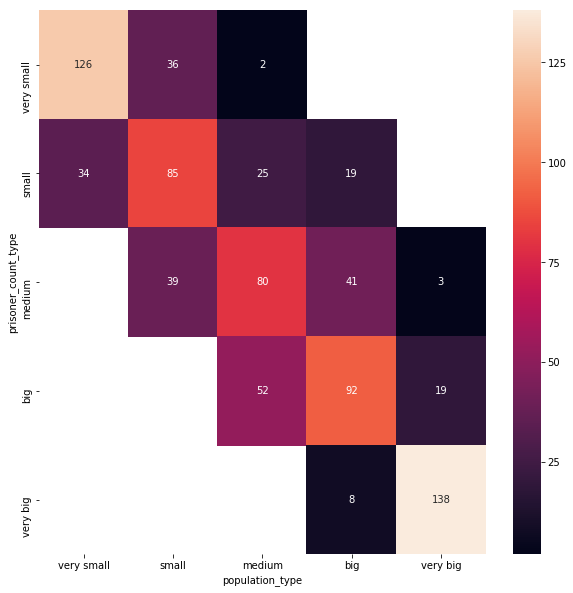

In [161]:
heatmap_count_types(prison, "prisoner_count_type", "population_type")

Using the heat map above, this heat map shows how population type and violent crime type interact. Generally the trend is that a large population type leads to a larger violent crime count which makes sense. 

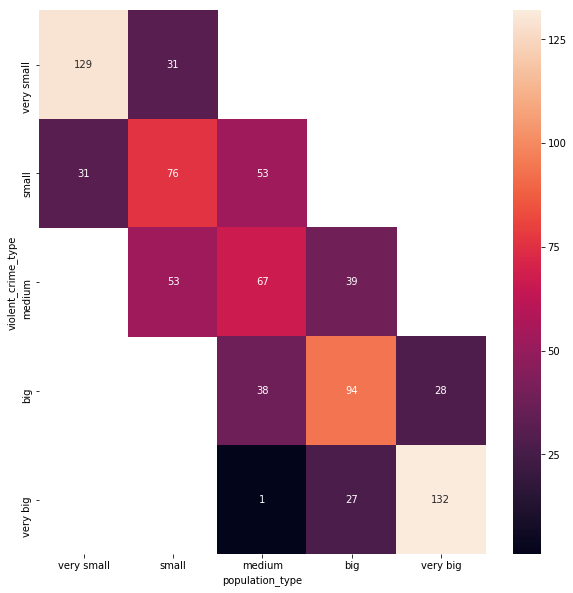

In [162]:
heatmap_count_types(prison, "violent_crime_type", "population_type")

## Analyzing Trends - Ratio of Prisoners by State Population

### Line Graph of for all States

This graphic outputs 51 line graphs showing the change in the ratio of prisoners per state population for each state from 2001 to 2016. Federal does not show because there is no state population for federal prisons as they have prisoners from all 50 states. 

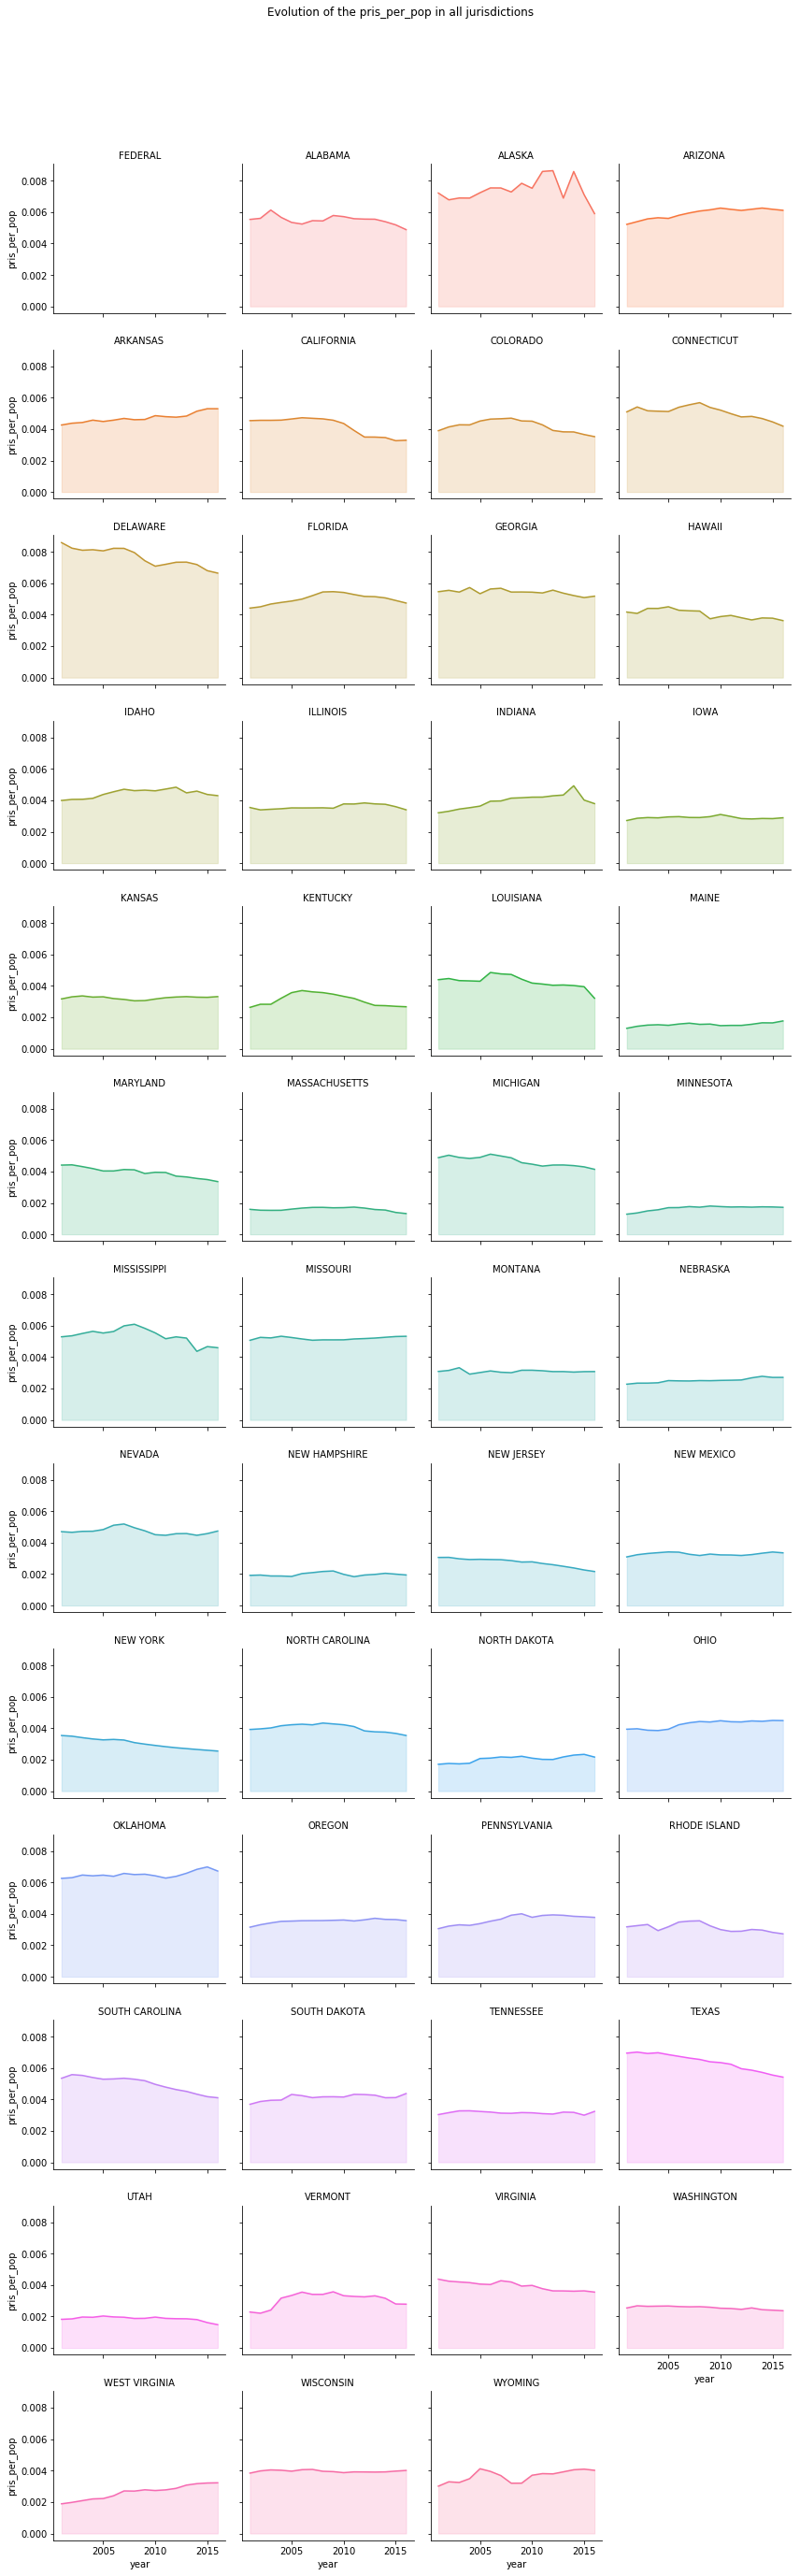

In [54]:
# Create a grid and initialize it
g = sns.FacetGrid(prison, col='jurisdiction', hue='jurisdiction', col_wrap=4, )
 
# Add the line over the area
g = g.map(plt.plot, 'year', 'pris_per_pop')
 
# Fill the area
g = g.map(plt.fill_between, 'year', 'pris_per_pop', alpha=0.2).set_titles("{col_name} jurisdiction")
 
# Adjust titles
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolution of the pris_per_pop in all jurisdictions')

### Line Graph of Individual States

The next three line graphs show the above trends in closer detail for Virginia, California, and Deleware. 

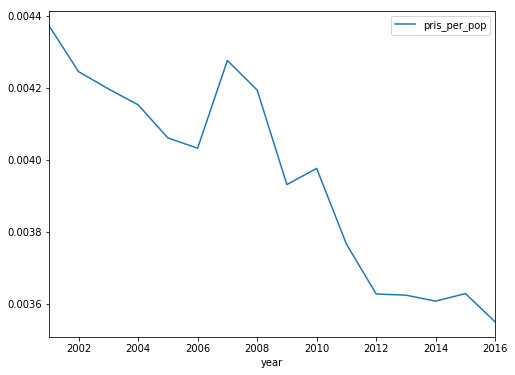

In [164]:
prison_va.plot.line(x='year', y='pris_per_pop', figsize=(8,6))

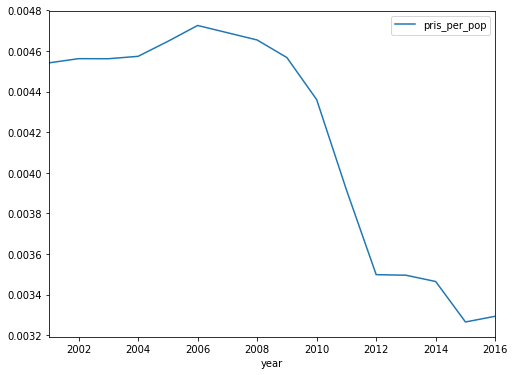

In [165]:
prison_ca.plot.line(x='year', y='pris_per_pop', figsize=(8,6))

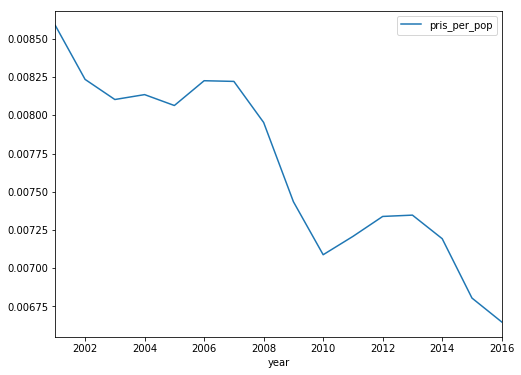

In [166]:
prison_de.plot.line(x='year', y='pris_per_pop', figsize=(8,6))

### Comparing Multiple States over 2001-2016

The graph below shows the trends of the ratio of prisoner count to state population for several states to show the scale of a large state to a small state.

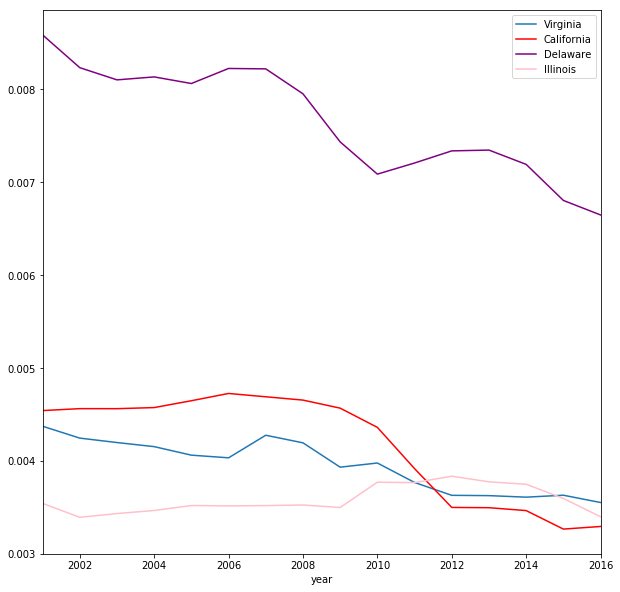

In [167]:
ax = plt.gca()

prison_va.plot(kind='line',x='year',y='pris_per_pop',ax=ax, label='Virginia')
prison_ca.plot(kind='line',x='year',y='pris_per_pop', color='red', ax=ax, label='California')
prison_de.plot(kind='line',x='year',y='pris_per_pop', color='purple', ax=ax, label='Delaware')
prison_il.plot(kind='line',x='year',y='pris_per_pop', color='pink', ax=ax, label='Illinois')

plt.show()

## Graphs for Prisoner Count 

### Line Graph and Scatterplot for All 50 States

This graphic outputs 51 line graphs showing the change in the prisoner count for each state from 2001 to 2016. The scatter plot shows all of these trends on one plot. 

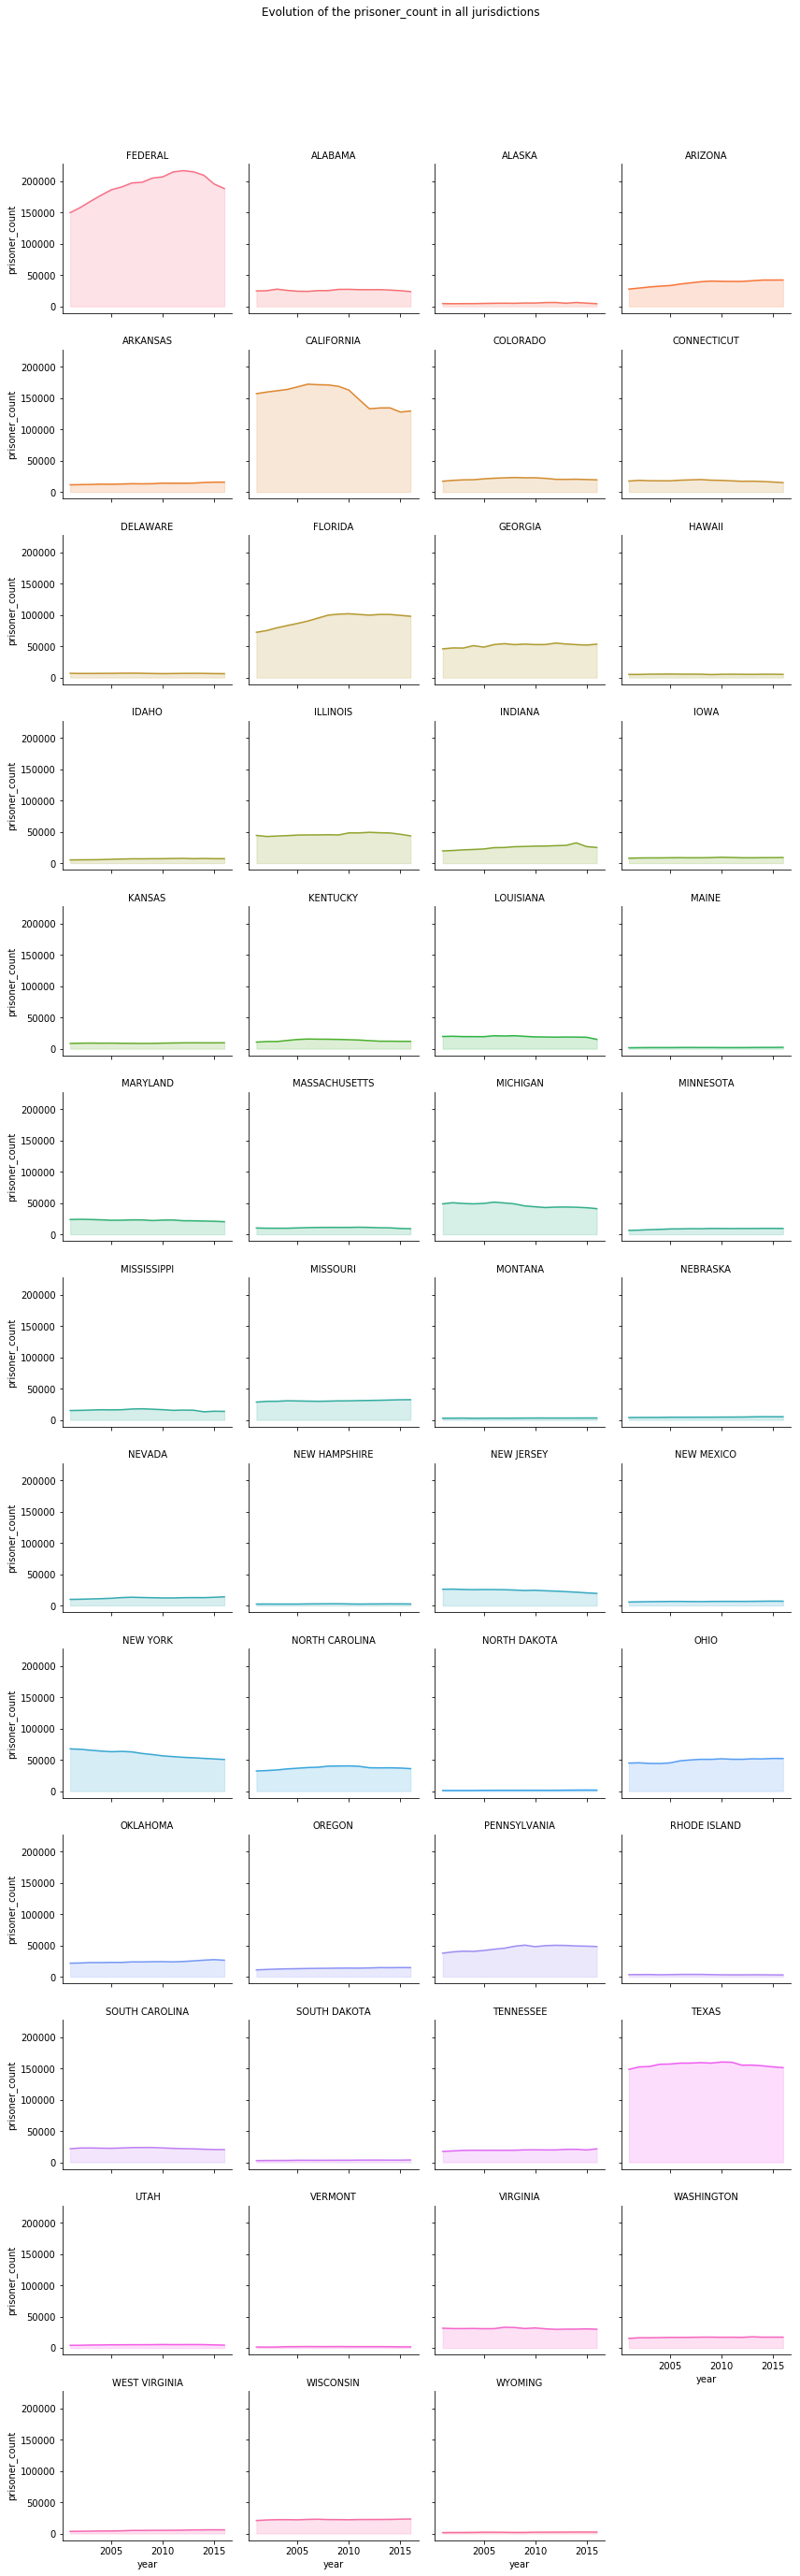

In [163]:
# Create a grid : initialize it
g = sns.FacetGrid(prison, col='jurisdiction', hue='jurisdiction', col_wrap=4, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'year', 'prisoner_count')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'year', 'prisoner_count', alpha=0.2).set_titles("{col_name} jurisdiction")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolution of the prisoner_count in all jurisdictions')

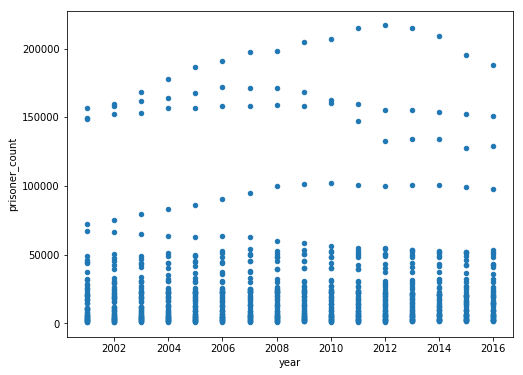

In [91]:
prison.plot.scatter(x='year', y='prisoner_count', figsize=(8,6))

### Line graph of selected states

The line graph shows the change in prisoner count for several states from 2001-2016.

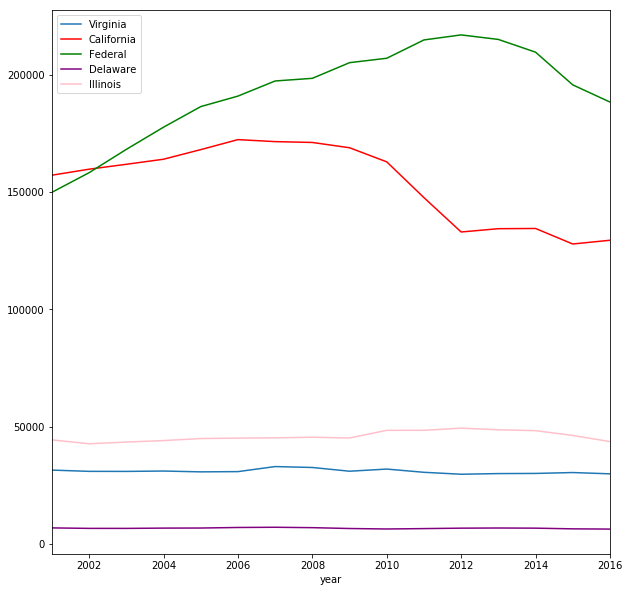

In [168]:
ax = plt.gca()

prison_va.plot(kind='line',x='year',y='prisoner_count',ax=ax, label='Virginia')
prison_ca.plot(kind='line',x='year',y='prisoner_count', color='red', ax=ax, label='California')
prison_fed.plot(kind='line',x='year',y='prisoner_count', color='green', ax=ax, label='Federal')
prison_de.plot(kind='line',x='year',y='prisoner_count', color='purple', ax=ax, label='Delaware')
prison_il.plot(kind='line',x='year',y='prisoner_count', color='pink', ax=ax, label='Illinois')

plt.show()

## Comparing the distribution of two variables

The next three graphs compare the distribution of prisoner_count and pris_per_pop for all years, 2001, and 2016. The top section shows the distribition of prisoner count, the right distribution shows the prisoner ratio to state population, and within the axis shows the interactions between these distributions. 

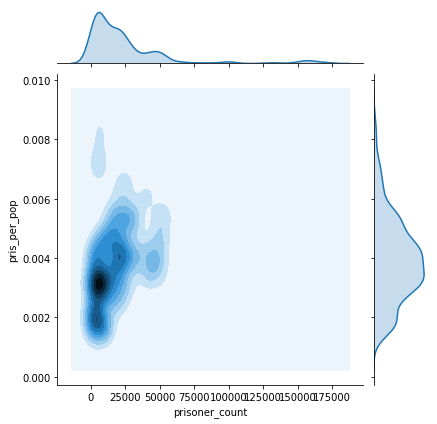

In [169]:
sns.jointplot(x=prison["prisoner_count"], y=prison["pris_per_pop"], kind='kde')

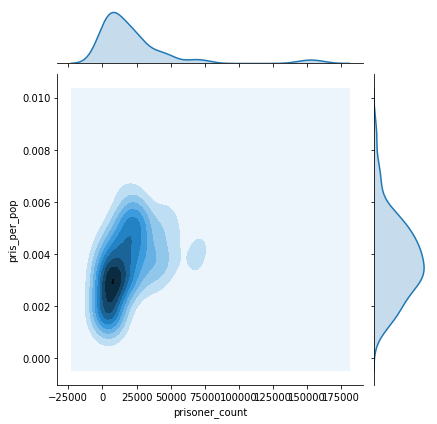

In [170]:
sns.jointplot(x=prison_2001["prisoner_count"], y=prison_2001["pris_per_pop"], kind='kde')

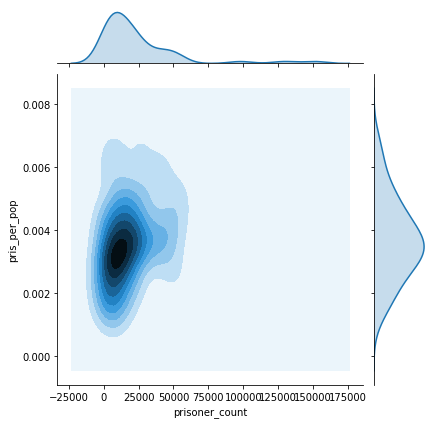

In [171]:
sns.jointplot(x=prison_2016["prisoner_count"], y=prison_2016["pris_per_pop"], kind='kde')

The next three graphs compare distribution of prisoner_count and state population for 2016, 2001, and all years. The top section shows the distribition of prisoner count, the right distribution shows state population, and within the axis shows the interactions between these distributions. 

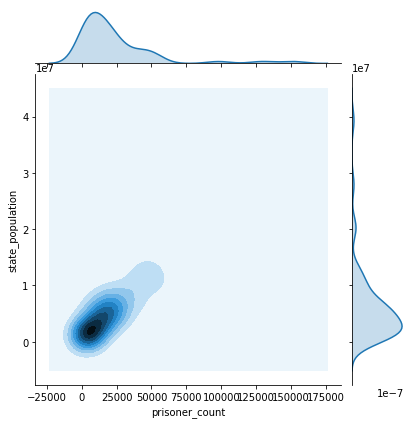

In [172]:
sns.jointplot(x=prison_2016["prisoner_count"], y=prison_2016["state_population"], kind='kde')

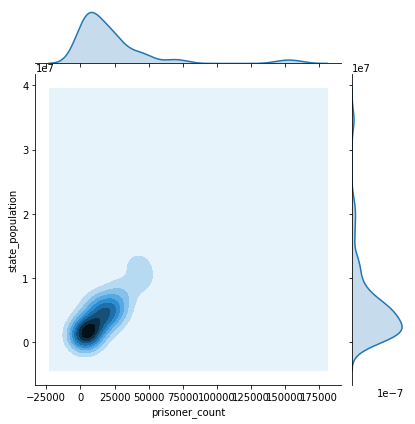

In [173]:
sns.jointplot(x=prison_2001["prisoner_count"], y=prison_2001["state_population"], kind='kde')

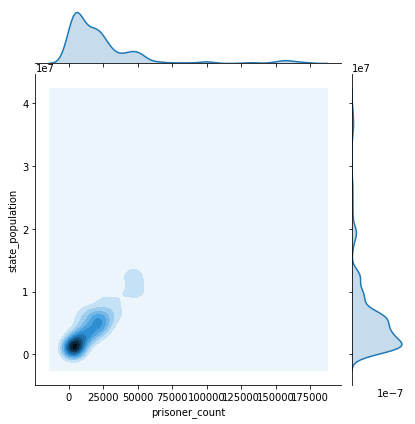

In [174]:
sns.jointplot(x=prison["prisoner_count"], y=prison["state_population"], kind='kde')

### Bubble Charts to Compare 3 variables 

This bubble chart shows the relationship between prisoner count (y axis), state population (x axis), and ratio of prisoner count to state population. The trend between prisoner count and state population is fairly linear. The color and size of the bubbles here reflects the ratio of prisoner count to state population, which you can see varies based on where each point lies on the trend. 

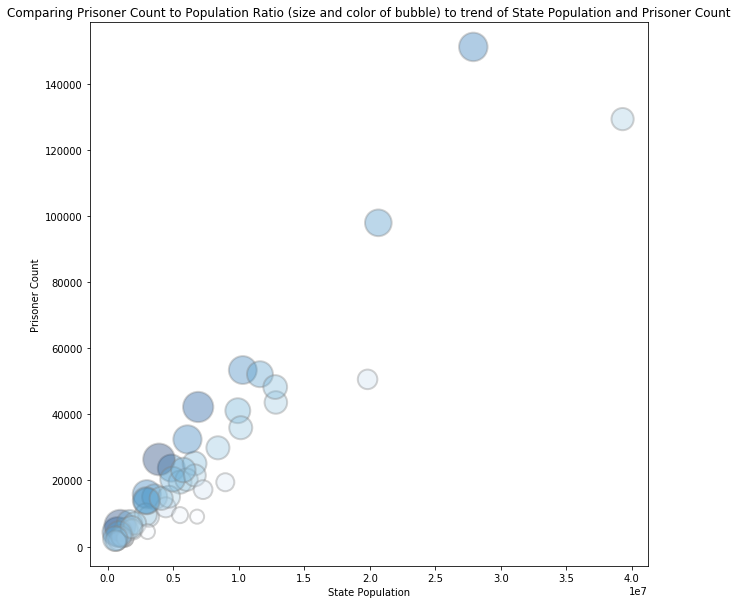

In [175]:
plt.scatter(prison_2016.state_population, prison_2016.prisoner_count, s=prison_2016.pris_per_pop*150000, c=prison_2016.pris_per_pop, cmap="Blues", alpha=0.35, edgecolors="grey", linewidth=2)
plt.xlabel("State Population")
plt.ylabel("Prisoner Count")
plt.title("Comparing Prisoner Count to Population Ratio (size and color of bubble) to trend of State Population and Prisoner Count")

plt.show()

This bubble chart shows the relationship between prisoner count to population ratio (y axis), state population (x axis), and prisoner count. The color and size of the bubbles here reflects the prisoner count, which you can see varies based on where each point lies on the trend. This trend shows a fairly flat line between the ratio of prisoner count to state population, and the state population. 

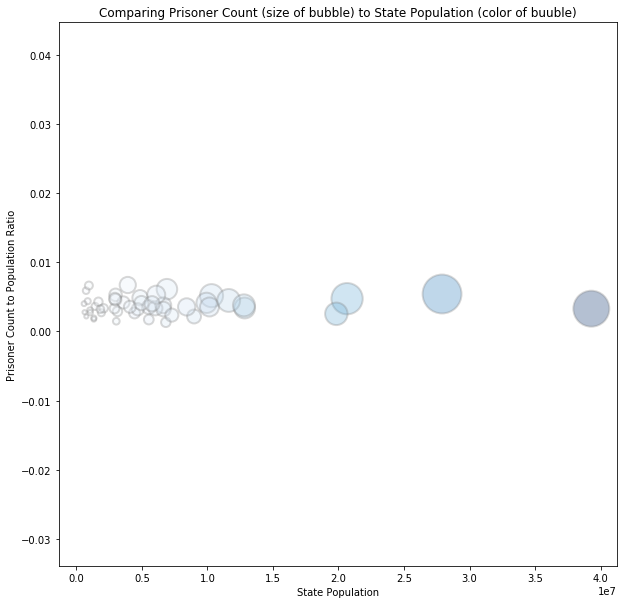

In [176]:
plt.scatter(prison_2016.state_population, prison_2016.pris_per_pop, s=prison_2016.prisoner_count*.01, c=prison_2016.state_population, cmap="Blues", alpha=0.3, edgecolors="grey", linewidth=2)
plt.xlabel("State Population")
plt.ylabel("Prisoner Count to Population Ratio")
plt.title("Comparing Prisoner Count (size of bubble) to State Population (color of buuble)")

plt.show()